# Plot data from Rigol DS1054Z scope

### Import the libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
import csv

### Import local libraries

In [2]:
from appvib import ClSigFeatures

### Define plot mode. 
Interactive mode is helpful for visuallizing the program execution

In [3]:
#%matplotlib widget

### Define function to read header values

In [4]:
def get_header(str_filename_in):
    """
    
    Pulls in the header information from the scope files
    
    Parameters
    ----------
    str_filename_in : string
        full file name to read
        
    Returns
    -------
    list : header values
    
    """
    
    # Read the CSV headers
    print(str_filename_in)
    file_handle = open(str_filename_in)
    csv_reader = csv.reader(file_handle)
    lst_header = next(csv_reader)
    print(lst_header)
    file_handle.close()

    return lst_header

### Define files to read

A helpful discussion on getting .csv files into Panda:
https://stackoverflow.com/questions/20906474/import-multiple-csv-files-into-pandas-and-concatenate-into-one-dataframe

#### Define the files to be read

In [5]:
lst_filenames = ['test_001_000.csv', 'test_001_001.csv', 'test_001_002.csv']

#### Read in the first data set and visualize the results

In [6]:
help(ClSigFeatures.b_read_data_as_df)

Help on function b_read_data_as_df in module appvib:

b_read_data_as_df(self, str_filename=None)
    Read the entire file in as a pandas dataframe
    
    Parameters
    ----------
    str_filename : string
        Filename, including .csv extension,  to read. If None then filename stored
        in the class is used
    
    Returns
    --------
    lst_data : list
            pandas dataframe : dataframe with all data from the file
            numpy array, datetime : vector with date and timestamps
            numpy array, double : vector with signal sampling rates
            numpy array, double : vector with delta time interval for each signal



In [7]:
str_filename = lst_filenames[0]
class_file = ClSigFeatures([1.,2.,3.], 1.)
lst_file = class_file.b_read_data_as_df(str_filename)

Push data into a new class

In [8]:
df1 = lst_file[0]
df1

,X,CH1,CH2
0,0,0.05,-0.024
1,1,0.02,0.048
2,2,0.02,-0.008
3,3,0.06,0.064
4,4,0.02,0.136
...,...,...,...
1195,1195,-0.01,-0.112
1196,1196,0.00,-0.024
1197,1197,0.04,-0.080
1198,1198,-0.01,-0.008


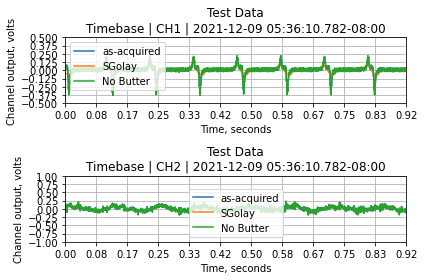

In [9]:
np_dt_timestamp = lst_file[1]
np_d_fs = lst_file[2]
class1 = ClSigFeatures(df1.CH1, np_d_fs[0], dt_timestamp=np_dt_timestamp[0])
class1.idx_add_sig(df1.CH2, d_fs=np_d_fs[1], str_point_name='CH2', dt_timestamp=np_dt_timestamp[1])
class1.ylim_tb(ylim_tb_in=[-0.5, 0.5])
class1.ylim_tb(ylim_tb_in=[-1.0, 1.0], idx=1)
lst_plot_sig = class1.plt_sigs()

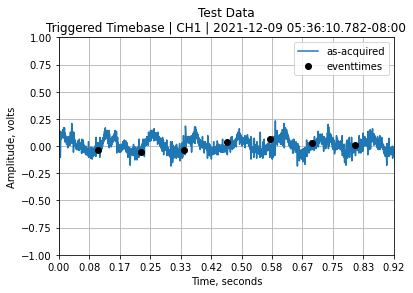

In [10]:
np_d_eventtimes = class1.np_d_est_triggers(np_d_sig=class1.np_d_sig, i_direction=0, d_threshold=0.125)
lst_plt_eventtimes = class1.plt_eventtimes(idx_eventtimes=0, idx=1)

In [11]:
class1.np_d_eventtimes()

array([0.1077549 , 0.22551459, 0.34231004, 0.46015179, 0.57788413,
       0.69463171, 0.8124461 ])

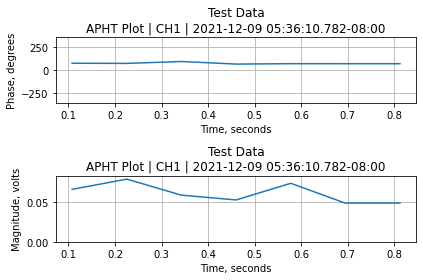

In [12]:
np_d_nx = class1.calc_nx(np_d_sig=class1.get_np_d_sig(idx=1), np_d_eventtimes=class1.np_d_eventtimes(),
                                          b_verbose=False)
lst_apht = class1.plt_apht()